In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import fastf1
import os

os.makedirs('data/raw/', exist_ok=True)

fastf1.Cache.enable_cache('data\\raw')

session = fastf1.get_session(2024, 'Monaco', 'R')
session.load()

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '55', '4', '63', '1', '44', '22', '23', '10', '14', '3', '77', '18', '2', '24', '31', '11', '27', '20']


In [3]:
print("Session Info:")
print(f"Event: {session.event}")
print(f"Session Type: {session.session_type}")
print(f"Date: {session.date}")
print(f"Weather: {session.weather_data}")

Session Info:
Event: RoundNumber                                            8
Country                                           Monaco
Location                                          Monaco
OfficialEventName    FORMULA 1 GRAND PRIX DE MONACO 2024
EventDate                            2024-05-26 00:00:00
EventName                              Monaco Grand Prix
EventFormat                                 conventional
Session1                                      Practice 1
Session1Date                   2024-05-24 13:30:00+02:00
Session1DateUtc                      2024-05-24 11:30:00
Session2                                      Practice 2
Session2Date                   2024-05-24 17:00:00+02:00
Session2DateUtc                      2024-05-24 15:00:00
Session3                                      Practice 3
Session3Date                   2024-05-25 12:30:00+02:00
Session3DateUtc                      2024-05-25 10:30:00
Session4                                      Qualifying
Session4Da

AttributeError: 'Session' object has no attribute 'session_type'

In [4]:
# Driver information
results = session.results
driver_details = results[['DriverNumber', 'Abbreviation', 'FullName', 'TeamName']].sort_values(by='FullName')
print(driver_details)

   DriverNumber Abbreviation          FullName         TeamName
23           23          ALB   Alexander Albon         Williams
55           55          SAI      Carlos Sainz          Ferrari
16           16          LEC   Charles Leclerc          Ferrari
3             3          RIC  Daniel Ricciardo               RB
31           31          OCO      Esteban Ocon           Alpine
14           14          ALO   Fernando Alonso     Aston Martin
63           63          RUS    George Russell         Mercedes
24           24          ZHO       Guanyu Zhou      Kick Sauber
20           20          MAG   Kevin Magnussen     Haas F1 Team
18           18          STR      Lance Stroll     Aston Martin
4             4          NOR      Lando Norris          McLaren
44           44          HAM    Lewis Hamilton         Mercedes
2             2          SAR    Logan Sargeant         Williams
1             1          VER    Max Verstappen  Red Bull Racing
27           27          HUL   Nico Hulk

## Driver Information

In [5]:
df_driver_details = pd.DataFrame(driver_details)
print(df_driver_details)

   DriverNumber Abbreviation          FullName         TeamName
23           23          ALB   Alexander Albon         Williams
55           55          SAI      Carlos Sainz          Ferrari
16           16          LEC   Charles Leclerc          Ferrari
3             3          RIC  Daniel Ricciardo               RB
31           31          OCO      Esteban Ocon           Alpine
14           14          ALO   Fernando Alonso     Aston Martin
63           63          RUS    George Russell         Mercedes
24           24          ZHO       Guanyu Zhou      Kick Sauber
20           20          MAG   Kevin Magnussen     Haas F1 Team
18           18          STR      Lance Stroll     Aston Martin
4             4          NOR      Lando Norris          McLaren
44           44          HAM    Lewis Hamilton         Mercedes
2             2          SAR    Logan Sargeant         Williams
1             1          VER    Max Verstappen  Red Bull Racing
27           27          HUL   Nico Hulk

In [10]:
df_driver_details.reindex(columns=['FullName', 'Abbreviation', 'TeamName', 'DriverNumber'])
df_driver_details.index = np.arange(len(df_driver_details))

df_driver_details


,DriverNumber,Abbreviation,FullName,TeamName
0,23,ALB,Alexander Albon,Williams
1,55,SAI,Carlos Sainz,Ferrari
2,16,LEC,Charles Leclerc,Ferrari
3,3,RIC,Daniel Ricciardo,RB
4,31,OCO,Esteban Ocon,Alpine
5,14,ALO,Fernando Alonso,Aston Martin
6,63,RUS,George Russell,Mercedes
7,24,ZHO,Guanyu Zhou,Kick Sauber
8,20,MAG,Kevin Magnussen,Haas F1 Team
9,18,STR,Lance Stroll,Aston Martin


In [12]:
df_driver_details.value_counts(normalize=True)

DriverNumber  Abbreviation  FullName          TeamName       
1             VER           Max Verstappen    Red Bull Racing    0.05
10            GAS           Pierre Gasly      Alpine             0.05
11            PER           Sergio Perez      Red Bull Racing    0.05
14            ALO           Fernando Alonso   Aston Martin       0.05
16            LEC           Charles Leclerc   Ferrari            0.05
18            STR           Lance Stroll      Aston Martin       0.05
2             SAR           Logan Sargeant    Williams           0.05
20            MAG           Kevin Magnussen   Haas F1 Team       0.05
22            TSU           Yuki Tsunoda      RB                 0.05
23            ALB           Alexander Albon   Williams           0.05
24            ZHO           Guanyu Zhou       Kick Sauber        0.05
27            HUL           Nico Hulkenberg   Haas F1 Team       0.05
3             RIC           Daniel Ricciardo  RB                 0.05
31            OCO           

In [14]:
df_driver_details.nunique()

DriverNumber    20
Abbreviation    20
FullName        20
TeamName        10
dtype: int64

In [16]:
# How many drivers per team
df_driver_details.TeamName.value_counts()

TeamName
Williams           2
Ferrari            2
RB                 2
Alpine             2
Aston Martin       2
Mercedes           2
Kick Sauber        2
Haas F1 Team       2
McLaren            2
Red Bull Racing    2
Name: count, dtype: int64

In [19]:
df_driver_details.describe()

,DriverNumber,Abbreviation,FullName,TeamName
count,20,20,20,20
unique,20,20,20,10
top,23,ALB,Alexander Albon,Williams
freq,1,1,1,2


## Session Information

In [25]:
session.session_info

{'Meeting': {'Key': 1236,
  'Name': 'Monaco Grand Prix',
  'OfficialName': 'FORMULA 1 GRAND PRIX DE MONACO 2024',
  'Location': 'Monaco',
  'Country': {'Key': 114, 'Code': 'MON', 'Name': 'Monaco'},
  'Circuit': {'Key': 22, 'ShortName': 'Monte Carlo'}},
 'ArchiveStatus': {'Status': 'Generating'},
 'Key': 9523,
 'Type': 'Race',
 'Name': 'Race',
 'StartDate': datetime.datetime(2024, 5, 26, 15, 0),
 'EndDate': datetime.datetime(2024, 5, 26, 17, 0),
 'GmtOffset': datetime.timedelta(seconds=7200),
 'Path': '2024/2024-05-26_Monaco_Grand_Prix/2024-05-26_Race/'}

In [29]:
s_results = session.results
s_results

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points,Laps
16,16,C LECLERC,LEC,leclerc,Ferrari,E80020,ferrari,Charles,Leclerc,Charles Leclerc,...,1.0,1,1.0,NaT,NaT,NaT,0 days 02:23:15.554000,Finished,25.0,78.0
81,81,O PIASTRI,PIA,piastri,McLaren,FF8000,mclaren,Oscar,Piastri,Oscar Piastri,...,2.0,2,2.0,NaT,NaT,NaT,0 days 00:00:07.152000,Finished,18.0,78.0
55,55,C SAINZ,SAI,sainz,Ferrari,E80020,ferrari,Carlos,Sainz,Carlos Sainz,...,3.0,3,3.0,NaT,NaT,NaT,0 days 00:00:07.585000,Finished,15.0,78.0
4,4,L NORRIS,NOR,norris,McLaren,FF8000,mclaren,Lando,Norris,Lando Norris,...,4.0,4,4.0,NaT,NaT,NaT,0 days 00:00:08.650000,Finished,12.0,78.0
63,63,G RUSSELL,RUS,russell,Mercedes,27F4D2,mercedes,George,Russell,George Russell,...,5.0,5,5.0,NaT,NaT,NaT,0 days 00:00:13.309000,Finished,10.0,78.0
1,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671C6,red_bull,Max,Verstappen,Max Verstappen,...,6.0,6,6.0,NaT,NaT,NaT,0 days 00:00:13.853000,Finished,8.0,78.0
44,44,L HAMILTON,HAM,hamilton,Mercedes,27F4D2,mercedes,Lewis,Hamilton,Lewis Hamilton,...,7.0,7,7.0,NaT,NaT,NaT,0 days 00:00:14.908000,Finished,7.0,78.0
22,22,Y TSUNODA,TSU,tsunoda,RB,6692FF,rb,Yuki,Tsunoda,Yuki Tsunoda,...,8.0,8,8.0,NaT,NaT,NaT,0 days 00:00:39.487000,Lapped,4.0,77.0
23,23,A ALBON,ALB,albon,Williams,64C4FF,williams,Alexander,Albon,Alexander Albon,...,9.0,9,9.0,NaT,NaT,NaT,0 days 00:00:54.052000,Lapped,2.0,77.0
10,10,P GASLY,GAS,gasly,Alpine,0093cc,alpine,Pierre,Gasly,Pierre Gasly,...,10.0,10,10.0,NaT,NaT,NaT,0 days 00:01:00.241000,Lapped,1.0,77.0


In [30]:
s_results.columns

Index(['DriverNumber', 'BroadcastName', 'Abbreviation', 'DriverId', 'TeamName',
       'TeamColor', 'TeamId', 'FirstName', 'LastName', 'FullName',
       'HeadshotUrl', 'CountryCode', 'Position', 'ClassifiedPosition',
       'GridPosition', 'Q1', 'Q2', 'Q3', 'Time', 'Status', 'Points', 'Laps'],
      dtype='object')

In [50]:
# Comprehensive Driver DF (Includes Race Results and Position data)

driver_df = pd.DataFrame(s_results)
driver_df

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points,Laps
16,16,C LECLERC,LEC,leclerc,Ferrari,E80020,ferrari,Charles,Leclerc,Charles Leclerc,...,1.0,1,1.0,NaT,NaT,NaT,0 days 02:23:15.554000,Finished,25.0,78.0
81,81,O PIASTRI,PIA,piastri,McLaren,FF8000,mclaren,Oscar,Piastri,Oscar Piastri,...,2.0,2,2.0,NaT,NaT,NaT,0 days 00:00:07.152000,Finished,18.0,78.0
55,55,C SAINZ,SAI,sainz,Ferrari,E80020,ferrari,Carlos,Sainz,Carlos Sainz,...,3.0,3,3.0,NaT,NaT,NaT,0 days 00:00:07.585000,Finished,15.0,78.0
4,4,L NORRIS,NOR,norris,McLaren,FF8000,mclaren,Lando,Norris,Lando Norris,...,4.0,4,4.0,NaT,NaT,NaT,0 days 00:00:08.650000,Finished,12.0,78.0
63,63,G RUSSELL,RUS,russell,Mercedes,27F4D2,mercedes,George,Russell,George Russell,...,5.0,5,5.0,NaT,NaT,NaT,0 days 00:00:13.309000,Finished,10.0,78.0
1,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671C6,red_bull,Max,Verstappen,Max Verstappen,...,6.0,6,6.0,NaT,NaT,NaT,0 days 00:00:13.853000,Finished,8.0,78.0
44,44,L HAMILTON,HAM,hamilton,Mercedes,27F4D2,mercedes,Lewis,Hamilton,Lewis Hamilton,...,7.0,7,7.0,NaT,NaT,NaT,0 days 00:00:14.908000,Finished,7.0,78.0
22,22,Y TSUNODA,TSU,tsunoda,RB,6692FF,rb,Yuki,Tsunoda,Yuki Tsunoda,...,8.0,8,8.0,NaT,NaT,NaT,0 days 00:00:39.487000,Lapped,4.0,77.0
23,23,A ALBON,ALB,albon,Williams,64C4FF,williams,Alexander,Albon,Alexander Albon,...,9.0,9,9.0,NaT,NaT,NaT,0 days 00:00:54.052000,Lapped,2.0,77.0
10,10,P GASLY,GAS,gasly,Alpine,0093cc,alpine,Pierre,Gasly,Pierre Gasly,...,10.0,10,10.0,NaT,NaT,NaT,0 days 00:01:00.241000,Lapped,1.0,77.0


## Individual Statistics for Columns

In [51]:
# Driver Countries
driver_df.CountryCode.value_counts()

CountryCode
GBR    3
ESP    2
AUS    2
FRA    2
MON    1
JPN    1
NED    1
THA    1
FIN    1
CAN    1
USA    1
CHN    1
MEX    1
GER    1
DEN    1
Name: count, dtype: int64

In [41]:
# Driver points
driver_points = pd.Series(s_results.Points, index=s_results.DriverNumber)
driver_points

DriverNumber
16    25.0
81    18.0
55    15.0
4     12.0
63    10.0
1      8.0
44     7.0
22     4.0
23     2.0
10     1.0
14     0.0
3      0.0
77     0.0
18     0.0
2      0.0
24     0.0
31     0.0
11     0.0
27     0.0
20     0.0
Name: Points, dtype: float64

In [43]:
driver_points.describe()

count    20.00000
mean      5.10000
std       7.36921
min       0.00000
25%       0.00000
50%       0.50000
75%       8.50000
max      25.00000
Name: Points, dtype: float64

In [47]:
driver_points.value_counts()

Points
0.0     10
18.0     1
25.0     1
15.0     1
12.0     1
8.0      1
10.0     1
7.0      1
4.0      1
2.0      1
1.0      1
Name: count, dtype: int64

<Axes: xlabel='DriverNumber'>

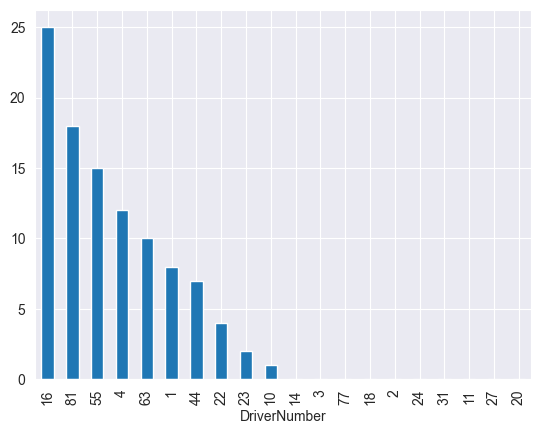

In [42]:
driver_points.plot.bar()

In [24]:
session.laps['LapTime']

0      0 days 00:40:56.330000
1                         NaT
2      0 days 00:01:24.624000
3      0 days 00:01:22.625000
4      0 days 00:01:21.795000
                ...          
1232   0 days 00:01:17.173000
1233                      NaT
1234                      NaT
1235                      NaT
1236                      NaT
Name: LapTime, Length: 1237, dtype: timedelta64[ns]

In [6]:
session.results.columns

Index(['DriverNumber', 'BroadcastName', 'Abbreviation', 'DriverId', 'TeamName',
       'TeamColor', 'TeamId', 'FirstName', 'LastName', 'FullName',
       'HeadshotUrl', 'CountryCode', 'Position', 'ClassifiedPosition',
       'GridPosition', 'Q1', 'Q2', 'Q3', 'Time', 'Status', 'Points', 'Laps'],
      dtype='object')

In [7]:
# Lap information

laps = session.laps
laps_df = laps[['LapTime', 'PitInTime', 'PitOutTime', 'Sector1Time', 'Sector2Time', 'Sector3Time']]
laps_df

,LapTime,PitInTime,PitOutTime,Sector1Time,Sector2Time,Sector3Time
0,0 days 00:40:56.330000,0 days 00:56:45.433000,NaT,NaT,0 days 00:00:46.389000,NaT
1,NaT,NaT,0 days 01:36:03.182000,0 days 00:00:26.854000,0 days 00:00:41.743000,NaT
2,0 days 00:01:24.624000,NaT,NaT,0 days 00:00:24.007000,0 days 00:00:38.235000,0 days 00:00:22.382000
3,0 days 00:01:22.625000,NaT,NaT,0 days 00:00:21.892000,0 days 00:00:38.779000,0 days 00:00:21.954000
4,0 days 00:01:21.795000,NaT,NaT,0 days 00:00:21.314000,0 days 00:00:38.513000,0 days 00:00:21.968000
...,...,...,...,...,...,...
1232,0 days 00:01:17.173000,NaT,NaT,0 days 00:00:20.460000,0 days 00:00:35.927000,0 days 00:00:20.786000
1233,NaT,NaT,NaT,NaT,NaT,NaT
1234,NaT,NaT,NaT,NaT,NaT,NaT
1235,NaT,NaT,NaT,NaT,NaT,NaT


In [8]:
# Comprehensive driver results
results = session.results

results_df = results[['DriverNumber','FullName', 'TeamName', 'Points', 'CountryCode', 'Position', 'GridPosition', 'Time']].sort_values(by='Points', ascending=False)
results_df

,DriverNumber,FullName,TeamName,Points,CountryCode,Position,GridPosition,Time
16,16,Charles Leclerc,Ferrari,25.0,MON,1.0,1.0,0 days 02:23:15.554000
81,81,Oscar Piastri,McLaren,18.0,AUS,2.0,2.0,0 days 00:00:07.152000
55,55,Carlos Sainz,Ferrari,15.0,ESP,3.0,3.0,0 days 00:00:07.585000
4,4,Lando Norris,McLaren,12.0,GBR,4.0,4.0,0 days 00:00:08.650000
63,63,George Russell,Mercedes,10.0,GBR,5.0,5.0,0 days 00:00:13.309000
1,1,Max Verstappen,Red Bull Racing,8.0,NED,6.0,6.0,0 days 00:00:13.853000
44,44,Lewis Hamilton,Mercedes,7.0,GBR,7.0,7.0,0 days 00:00:14.908000
22,22,Yuki Tsunoda,RB,4.0,JPN,8.0,8.0,0 days 00:00:39.487000
23,23,Alexander Albon,Williams,2.0,THA,9.0,9.0,0 days 00:00:54.052000
10,10,Pierre Gasly,Alpine,1.0,FRA,10.0,10.0,0 days 00:01:00.241000


In [9]:
laps_full = session.laps
results_full = session.results

merged_df = pd.merge(laps_full, results_full,
                    on='DriverNumber',  # or whatever column they share
                    how='left')

merged_df.head(10)

,Time_x,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Position_y,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time_y,Status,Points,Laps
0,0 days 01:36:02.319000,LEC,16,0 days 00:40:56.330000,1.0,1.0,NaT,0 days 00:56:45.433000,NaT,0 days 00:00:46.389000,...,1.0,1,1.0,NaT,NaT,NaT,0 days 02:23:15.554000,Finished,25.0,78.0
1,0 days 01:39:00.140000,LEC,16,NaT,2.0,2.0,0 days 01:36:03.182000,NaT,0 days 00:00:26.854000,0 days 00:00:41.743000,...,1.0,1,1.0,NaT,NaT,NaT,0 days 02:23:15.554000,Finished,25.0,78.0
2,0 days 01:40:24.764000,LEC,16,0 days 00:01:24.624000,3.0,2.0,NaT,NaT,0 days 00:00:24.007000,0 days 00:00:38.235000,...,1.0,1,1.0,NaT,NaT,NaT,0 days 02:23:15.554000,Finished,25.0,78.0
3,0 days 01:41:47.389000,LEC,16,0 days 00:01:22.625000,4.0,2.0,NaT,NaT,0 days 00:00:21.892000,0 days 00:00:38.779000,...,1.0,1,1.0,NaT,NaT,NaT,0 days 02:23:15.554000,Finished,25.0,78.0
4,0 days 01:43:09.184000,LEC,16,0 days 00:01:21.795000,5.0,2.0,NaT,NaT,0 days 00:00:21.314000,0 days 00:00:38.513000,...,1.0,1,1.0,NaT,NaT,NaT,0 days 02:23:15.554000,Finished,25.0,78.0
5,0 days 01:44:30.329000,LEC,16,0 days 00:01:21.145000,6.0,2.0,NaT,NaT,0 days 00:00:21.568000,0 days 00:00:38.168000,...,1.0,1,1.0,NaT,NaT,NaT,0 days 02:23:15.554000,Finished,25.0,78.0
6,0 days 01:45:51.309000,LEC,16,0 days 00:01:20.980000,7.0,2.0,NaT,NaT,0 days 00:00:21.370000,0 days 00:00:38.056000,...,1.0,1,1.0,NaT,NaT,NaT,0 days 02:23:15.554000,Finished,25.0,78.0
7,0 days 01:47:12.339000,LEC,16,0 days 00:01:21.030000,8.0,2.0,NaT,NaT,0 days 00:00:21.250000,0 days 00:00:38.171000,...,1.0,1,1.0,NaT,NaT,NaT,0 days 02:23:15.554000,Finished,25.0,78.0
8,0 days 01:48:32.453000,LEC,16,0 days 00:01:20.114000,9.0,2.0,NaT,NaT,0 days 00:00:21.092000,0 days 00:00:37.612000,...,1.0,1,1.0,NaT,NaT,NaT,0 days 02:23:15.554000,Finished,25.0,78.0
9,0 days 01:49:53.228000,LEC,16,0 days 00:01:20.775000,10.0,2.0,NaT,NaT,0 days 00:00:21.036000,0 days 00:00:37.886000,...,1.0,1,1.0,NaT,NaT,NaT,0 days 02:23:15.554000,Finished,25.0,78.0


## Who had the fastest lap time? What about fastest sectors?

In [10]:
# Fastest lap

fastest_each_driver = session.laps.pick_fastest()
print(fastest_each_driver[['Driver', 'LapTime']])

# Who has the overall fastest time in each sector
fastest_s1 = merged_df.loc[merged_df['Sector1Time'].idxmin()]
fastest_s2 = merged_df.loc[merged_df['Sector2Time'].idxmin()]
fastest_s3 = merged_df.loc[merged_df['Sector3Time'].idxmin()]

print(f"Fastest S1: {fastest_s1['Driver']} - {fastest_s1['Sector1Time']}")
print(f"Fastest S2: {fastest_s2['Driver']} - {fastest_s2['Sector2Time']}")
print(f"Fastest S3: {fastest_s3['Driver']} - {fastest_s3['Sector3Time']}")



Driver                        HAM
LapTime    0 days 00:01:14.165000
dtype: object
Fastest S1: VER - 0 days 00:00:19.343000
Fastest S2: HAM - 0 days 00:00:34.842000
Fastest S3: HAM - 0 days 00:00:19.700000


## How do lap times compare between teammates?


In [11]:
# Visualize teammates
teammates = merged_df.groupby('TeamName')['FullName'].unique()
teammates


TeamName
Alpine                   [Pierre Gasly, Esteban Ocon]
Aston Martin          [Fernando Alonso, Lance Stroll]
Ferrari               [Charles Leclerc, Carlos Sainz]
Haas F1 Team       [Nico Hulkenberg, Kevin Magnussen]
Kick Sauber            [Valtteri Bottas, Guanyu Zhou]
McLaren                 [Oscar Piastri, Lando Norris]
Mercedes             [George Russell, Lewis Hamilton]
RB                   [Yuki Tsunoda, Daniel Ricciardo]
Red Bull Racing        [Max Verstappen, Sergio Perez]
Williams            [Alexander Albon, Logan Sargeant]
Name: FullName, dtype: object

In [12]:
# Lap times
lap_times = merged_df.groupby('LapTime')['TeamName'].aggregate(['min', 'max'])
lap_times

,min,max
LapTime,,
0 days 00:01:14.165000,Mercedes,Mercedes
0 days 00:01:14.204000,Mercedes,Mercedes
0 days 00:01:14.423000,Mercedes,Mercedes
0 days 00:01:14.569000,Red Bull Racing,Red Bull Racing
0 days 00:01:14.718000,Kick Sauber,Kick Sauber
...,...,...
0 days 00:41:47.607000,RB,RB
0 days 00:41:53.184000,Aston Martin,Aston Martin
0 days 00:41:56.858000,Williams,Williams


In [13]:
# Compare drivers within each team
teammate_comparison = merged_df.groupby(['TeamName', 'FullName'])['LapTime'].agg(['min', 'max', 'mean'])
print(teammate_comparison)

                                                    min  \
TeamName        FullName                                  
Alpine          Esteban Ocon                        NaT   
                Pierre Gasly     0 days 00:01:15.625000   
Aston Martin    Fernando Alonso  0 days 00:01:17.939000   
                Lance Stroll     0 days 00:01:16.710000   
Ferrari         Carlos Sainz     0 days 00:01:14.726000   
                Charles Leclerc  0 days 00:01:15.162000   
Haas F1 Team    Kevin Magnussen                     NaT   
                Nico Hulkenberg                     NaT   
Kick Sauber     Guanyu Zhou      0 days 00:01:14.718000   
                Valtteri Bottas  0 days 00:01:16.561000   
McLaren         Lando Norris     0 days 00:01:15.742000   
                Oscar Piastri    0 days 00:01:16.281000   
Mercedes        George Russell   0 days 00:01:15.228000   
                Lewis Hamilton   0 days 00:01:14.165000   
RB              Daniel Ricciardo 0 days 00:01:17.172000 

## How consistent are drivers' lap times (coefficient of variation)?

In [41]:
cv_by_driver = merged_df.groupby(['Driver', 'TeamName'])['LapTime'].agg(['mean', 'std'])
cv_by_driver['Driver'] = cv_by_driver['std'] / cv_by_driver['mean']

print(cv_by_driver['Driver'].sort_values(ascending=False))

total_laps = session.total_laps
print(f'Total Laps: {total_laps}\n '
      f'lower cv: {cv_by_driver["Driver"].min():4f}\n'
      f'higher cv: {cv_by_driver["Driver"].max():4f}\n')

Driver  TeamName       
HAM     Mercedes           2.495603
VER     Red Bull Racing    2.492226
RUS     Mercedes           2.488457
NOR     McLaren            2.485410
SAI     Ferrari            2.481673
LEC     Ferrari            2.478862
PIA     McLaren            2.478669
BOT     Kick Sauber        2.474515
SAR     Williams           2.468235
ALO     Aston Martin       2.465968
ZHO     Kick Sauber        2.463863
RIC     RB                 2.460232
STR     Aston Martin       2.454971
GAS     Alpine             2.450727
ALB     Williams           2.449674
TSU     RB                 2.447803
HUL     Haas F1 Team            NaN
MAG     Haas F1 Team            NaN
OCO     Alpine                  NaN
PER     Red Bull Racing         NaN
Name: Driver, dtype: float64
Total Laps: 78
 lower cv: 2.447803
higher cv: 2.495603



## Truns / Churn